# Conclusion of the diss
To Showcase in dissertation for the TNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from mawkutils.render import prettify

IMG_PATH = Path().cwd().parent / 'notebooks' / 'img'

In [27]:
perfs = {  #(mse, l_infty, model size)
    'Wallscheid LPTN': (1.9644631629919496, 7.3148254235166945, 34),
    'Retrained Wallscheid LPTN': (1.7863378863477979, 8.401747677145067, 34),
    'GRU': (1.147823, 5.457064, 24744),
    'SMALL GRU': (2.126000, 7.275300, 1002),
    'TNN': (1.343348775495115, 6.712624950918993, 1812),
    'SMALL TNN': (2.050615, 5.993497, 68),
    'Explicit Euler': (4.122200, 9.821387, 708),
    'LASSO': (7.5117, 22.88, 472),
    #'MLP': (3.58, 24.27, 1380),
}

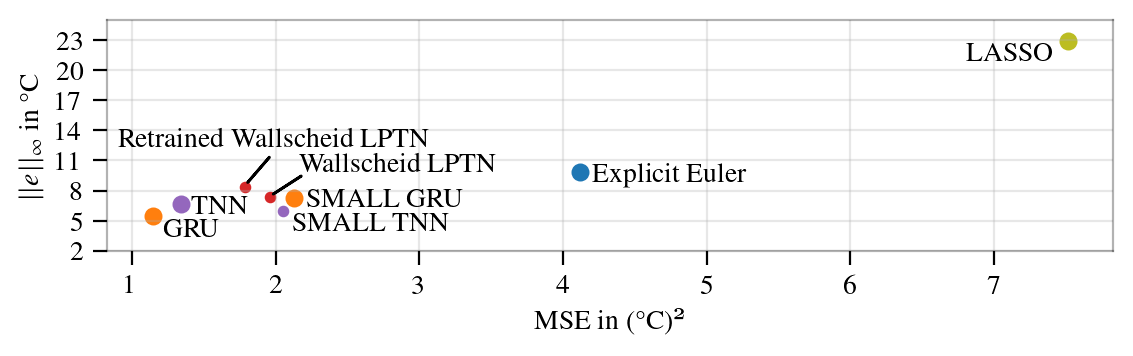

In [30]:
fig_size = (6.49, 1.5)   # fit into diss format
fig = plt.figure(figsize=fig_size, dpi=200)
ax = fig.gca()
color_code = {'GRU': 'tab:orange', 'SMALL GRU': 'tab:orange',
              'Wallscheid LPTN': 'tab:red', 'Retrained Wallscheid LPTN': 'tab:red',
              'TNN': 'tab:purple', 'SMALL TNN': 'tab:purple',
              'Explicit Euler': 'tab:blue',
              'LASSO': 'tab:olive', 'MLP':'crimson'
              }
loc_code = {'GRU': [0.07, -2.0], 'TNN': [0.07, -1.0], 'Retrained Wallscheid LPTN': [0.2, 4], 'SMALL TNN': [0.07, -2.1],
            'Wallscheid LPTN': [0.2, 2.6], 'SMALL GRU': [0.09, -1.0], 'Explicit Euler': [0.08, -1.0],
            'LASSO': [-0.1, -2], 'MLP': [0.07, -3.0]
            }
for mdl, (mse, linfty, mdl_size) in perfs.items():
    ax.scatter(mse, linfty, label=mdl, c=color_code[mdl], s=10 if (mdl.startswith("SMALL TNN") or mdl.endswith("LPTN")) else 30)

    inc = loc_code.get(mdl, [0, 0])
    alignment = 'right' if mdl in ('LASSO', ) else 'left'
    if mdl.startswith("Retrained"):
        alignment = 'center'
    ax.annotate(mdl, xy=(mse+0.01, linfty+0.25), xytext=(mse+inc[0], linfty+inc[1]), horizontalalignment=alignment,
                arrowprops=dict(facecolor='black', width=0.1, shrink=0.05, headwidth=0.1,) if mdl.endswith("LPTN") else None)

df = pd.DataFrame(perfs, index=['mse', 'linfty', 'model_size'])
#ax.text(s=f"{'Model size:' : ^10}\n" + '\n'.join(f"{row.loc['index']:<10}: {str(int(row.model_size)):>10}" for i, row in df.T.reset_index(drop=False).sort_values('model_size').iterrows()),
#        y=0.99, x=1.05, transform=ax.transAxes, verticalalignment='top', horizontalalignment='left', multialignment='right')
ax.set_xlabel("MSE in (°C)²")
ax.set_ylabel("$||e||_\infty$ in °C")

ax.set_yticks(np.arange(2, 29, 3))
ax.set_ylim(2, 25)
#ax.set_yscale('log')
prettify(ax)
fig.savefig(IMG_PATH / "diss_conclusion.pdf", dpi = 300, bbox_inches = "tight")